# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [2]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
df_measels = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
df_measels |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


In [5]:
# create the df_vacc_rates here

df_vacc_rates = df_measels |> 
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(above_95 = sum(mmr >= 95, na.rm = TRUE),
            total_observations = n()) |>
    mutate(vacc_rates = above_95 / total_observations) |>
    arrange(vacc_rates)

df_vacc_rates


state,above_95,total_observations,vacc_rates
<chr>,<int>,<int>,<dbl>
Arkansas,2,567,0.003527337
Washington,646,1978,0.326592518
North Dakota,164,360,0.455555556
Maine,169,357,0.473389356
Minnesota,755,1593,0.473948525
Ohio,1435,2919,0.491606715
Arizona,593,1171,0.506404782
Oregon,478,806,0.593052109
Colorado,939,1507,0.623092236


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [6]:
df_vacc_rates |> 
    slice_min(vacc_rates, n=1)

state,above_95,total_observations,vacc_rates
<chr>,<int>,<int>,<dbl>
Arkansas,2,567,0.003527337


In [7]:
#Arkansas has the smallest fraction of schools above the CDC target vaccination rate. 

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [8]:
df_plot = df_measels |>
    filter(state == "North Carolina") |>
    arrange(overall) |>
    mutate(fraction = row_number() / n())
df_plot


index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,fraction
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1767,North Carolina,2018-19,Renaissance Montessori Sch. of Cary,NA,NA,Wake,NA,4,-1,-1.0,NA,NA,NA,35.76823,-78.74369,0.0004796163
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,0.0009592326
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,0.0014388489
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,0.0019184652
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,0.0023980815
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5.0,NA,36.06362,-78.92544,0.0028776978
1761,North Carolina,2018-19,Nations Ford Elementary,NA,NA,Mecklenburg,NA,117,-1,45.3,NA,0.9,NA,35.15489,-80.90022,0.0033573141
1760,North Carolina,2018-19,Riverside Christian Academy,NA,NA,Cumberland,NA,13,-1,46.2,NA,NA,NA,34.62371,-79.15916,0.0038369305
1760,North Carolina,2018-19,Riverside Christian Academy,NA,NA,Cumberland,NA,13,-1,46.2,NA,NA,NA,35.05898,-78.84862,0.0043165468


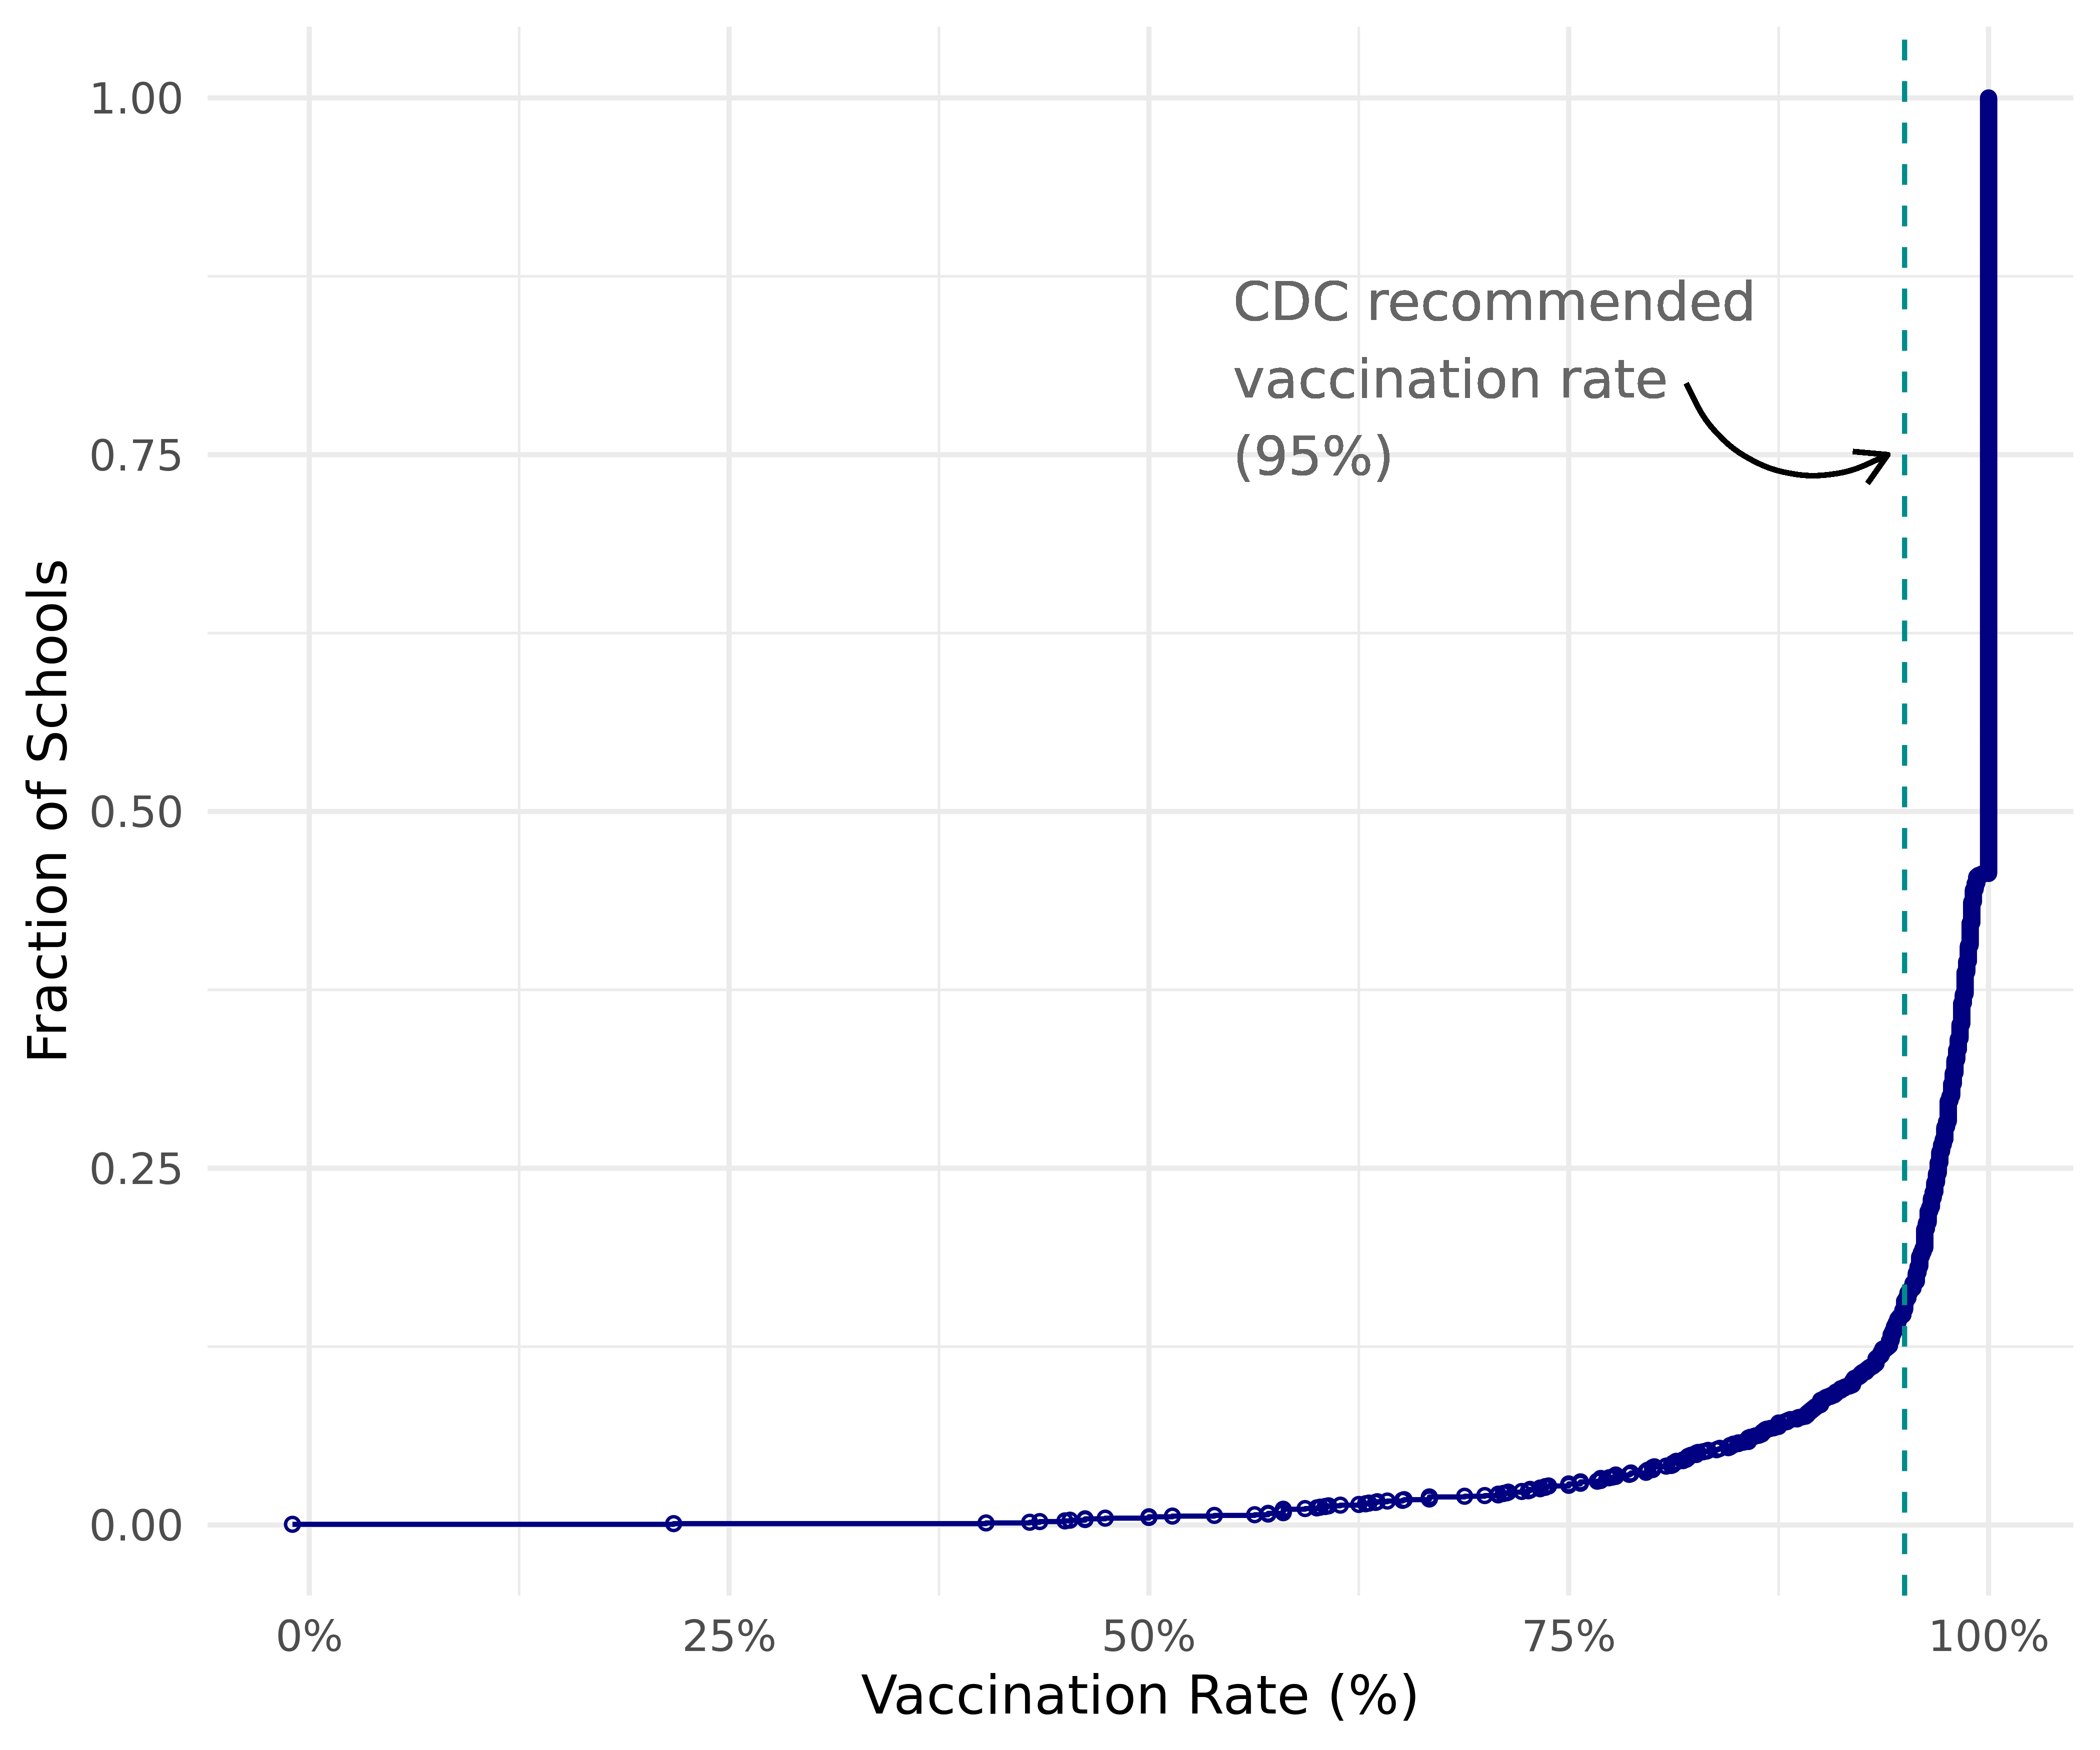

In [30]:
options(repr.plot.height = 5, repr.plot.width = 6, repr.plot.res = 700)

p = ggplot(df_plot, aes(x = overall, y = fraction)) + 
    geom_step(na.rm = TRUE, color = 'navy') +
    geom_point(na.rm = TRUE, color = 'navy', shape = 1, size = 1) +
    xlab("Vaccination Rate (%)") +
    ylab("Fraction of Schools") +
    scale_x_continuous(labels = scales::percent_format(scale=1)) +
    theme_minimal() +
    geom_vline(xintercept = 95, linetype = "dashed", color = "darkcyan") +
    geom_text(aes(x = 55, y = 0.6, hjust=1,label = "CDC recommended 
vaccination rate 
(95%)"), color = 'grey40', vjust = -1, hjust = 0) +
    geom_curve(aes(x=82, y= 0.80, xend=94, yend=0.75), size=0.5, arrow=arrow(length=unit(0.1, 'inches'), ends='last', type='open'))

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [29]:
df_plot |> 
    filter(state == 'North Carolina') |> 
    summarize(median_nc_vacc_rates = median(overall))

median_nc_vacc_rates
<dbl>
100


In [27]:
#Yes, the median vaccination rate for NC schools is above CDC recommended target.